This is a notebook to explore the films of **Marvel's Cinematic Universe**. We have data on films in the first three phases of the MCU. The notebook looks at how the films compare in terms of highest gross and ratings (IMDb and metascore), how ratings and budget correlate, and who are the top stars and directors in the MCU.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcu-complete-dataset/mcu dataset.csv


### Load and summarize the data

In [2]:
index_col = ['Name']
mcu_df = pd.read_csv('/kaggle/input/mcu-complete-dataset/mcu dataset.csv', index_col=index_col)
mcu_df.head()

,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
Name,,,,,,,,,,,,,,,
Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1


In [3]:
mcu_df.describe()

,IMDB rating,metascore,Oscar Nomination,Oscar won,Phase
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,7.443478,68.652174,0.826087,0.130435,2.217391
std,0.508854,7.906319,1.497033,0.625543,0.850482
min,6.600000,54.000000,0.000000,0.000000,1.000000
25%,7.000000,64.000000,0.000000,0.000000,1.500000
50%,7.400000,69.000000,0.000000,0.000000,2.000000
75%,7.850000,73.500000,1.000000,0.000000,3.000000
max,8.400000,88.000000,7.000000,3.000000,3.000000


In [4]:
mcu_df.dtypes

US release Date      object
Director             object
Producer             object
Duration             object
Genre                object
IMDB rating         float64
metascore             int64
Cast                 object
Budget               object
Domestic Gross       object
Total Gross          object
Opening Gross        object
Oscar Nomination      int64
Oscar won             int64
Phase                 int64
dtype: object

In [5]:
# Convert all of the money columns to int values.
money_cols = ['Budget', 'Domestic Gross', 'Total Gross', 'Opening Gross']
mcu_df[money_cols] = mcu_df[money_cols].apply(lambda x: x.str.strip('$').str.replace(',', '')).astype(int)

### Which films are the highest-grossing?
Let's first take a look at a plot showing the total gross for each film. We'll set the bars to different colors for each MCU phase.

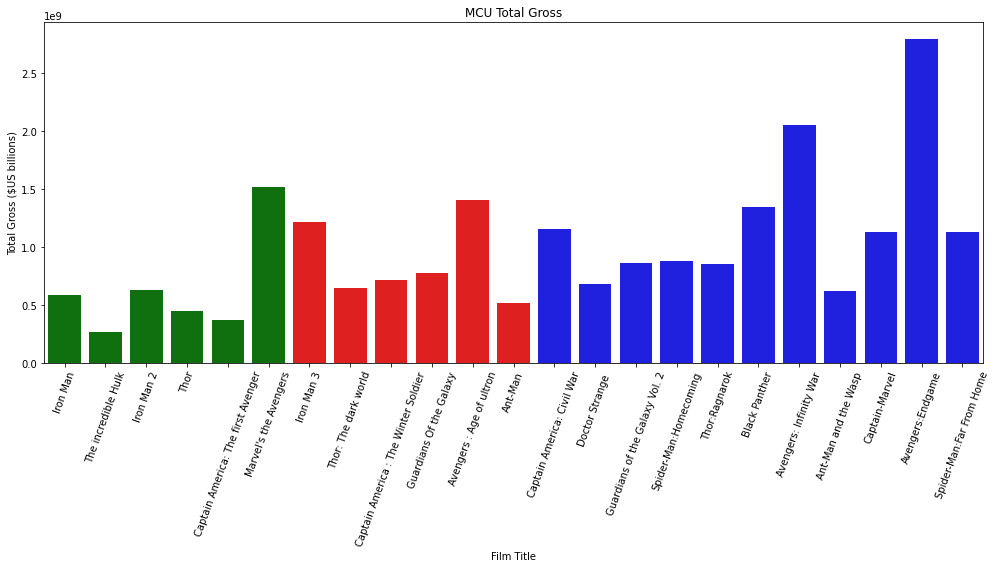

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(14, 8))
plt.title("MCU Total Gross")

phase_colors = {1:'green', 2:'red', 3:'blue'}
colors = mcu_df['Phase'].map(phase_colors)

sns.barplot(x=mcu_df.index, y=mcu_df['Total Gross'], palette=colors)
plt.xlabel("Film Title")
plt.xticks(rotation=70)
plt.ylabel("Total Gross ($US billions)")
plt.tight_layout()

Next, I'd like to see if there's any correlation between an MCU film's budget and its rating. Before we do that, let's look at the two ratings (IMDb and metascore) side-by-side to see if they agree.

<AxesSubplot:xlabel='IMDB rating', ylabel='metascore'>

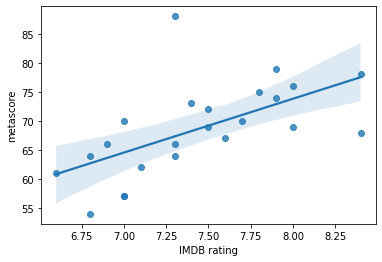

In [7]:
sns.regplot(x=mcu_df['IMDB rating'], y=mcu_df['metascore'])

It looks like there might be a few outliers. Let's take a closer look at these two columns.

In [8]:
ratings_df = mcu_df[['IMDB rating', 'metascore']].reset_index()

# reset metascore so they're on the same scale
ratings_df['metascore'] = ratings_df['metascore'] / 10.0 
ratings_df.columns = ['Film Title', 'IMDB rating', 'metascore']

# Correct a few titles
ratings_df.loc[1, 'Film Title'] = 'The Incredible Hulk'
ratings_df.loc[4, 'Film Title'] = 'Captain America: The First Avenger'
ratings_df.loc[7, 'Film Title'] = 'Thor: The Dark World'
ratings_df.loc[9, 'Film Title'] = 'Guardians of the Galaxy'
ratings_df.loc[10, 'Film Title'] = 'Avengers: Age of Ultron'

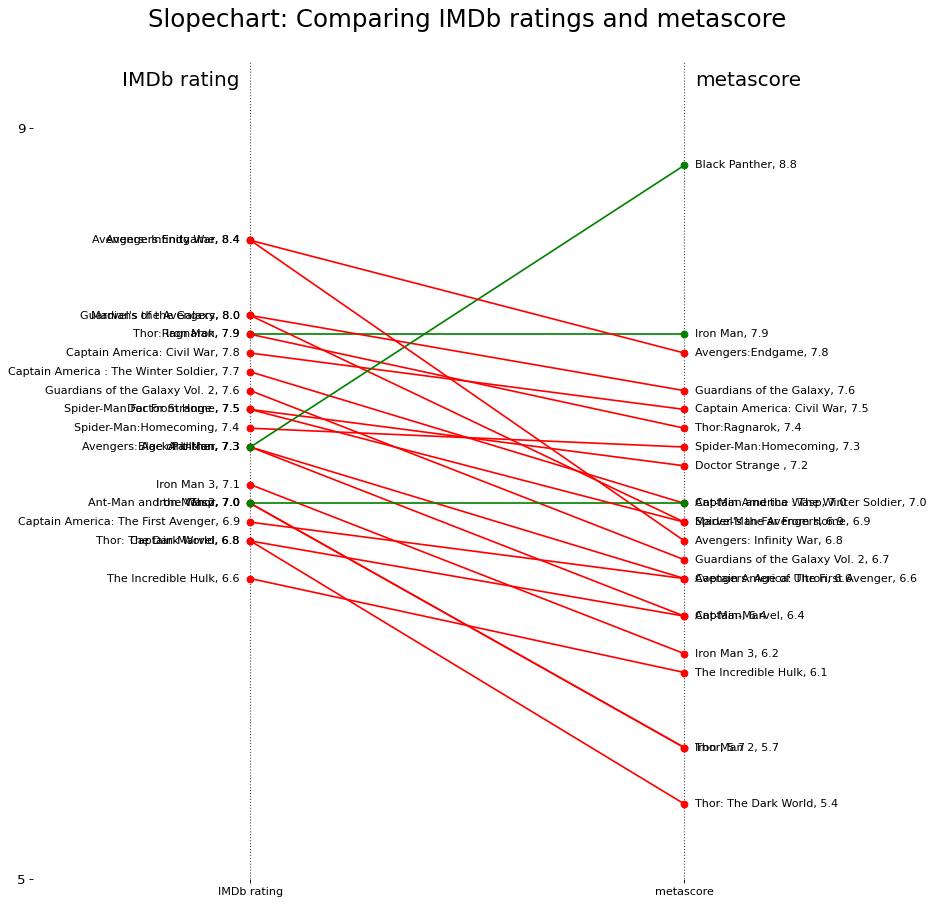

In [9]:
import matplotlib.lines as mlines

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=5, ymax=9.35, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=5, ymax=9.35, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Line Segments and Annotation
for p1, p2, c in zip(ratings_df['IMDB rating'], ratings_df['metascore'], ratings_df['Film Title']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1, 1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2, 1)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# 'IMDb' and 'metascore' Annotations
ax.text(1-0.05, 9.25, 'IMDb rating', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':500})
ax.text(3+0.05, 9.25, 'metascore', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':500})

# Decoration
ax.set_title("Slopechart: Comparing IMDb ratings and metascore", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(5, 9.5))
ax.set_xticks([1,3])
ax.set_xticklabels(["IMDb rating", "metascore"])
plt.yticks(np.arange(5, 10, 4), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)

It's a little hard to read with data points spaced so closely that they overlap, but this does give us an idea of the ranking order of the films on both ratings scales. The biggest discrepancies are for the films Iron Man 2, Thor 2, Black Panther, and Avengers: Infinity War. I tend to agree more with the ranking of the IMDb scores, so let's use those.

Text(0.5, 0, 'Budget (US millions)')

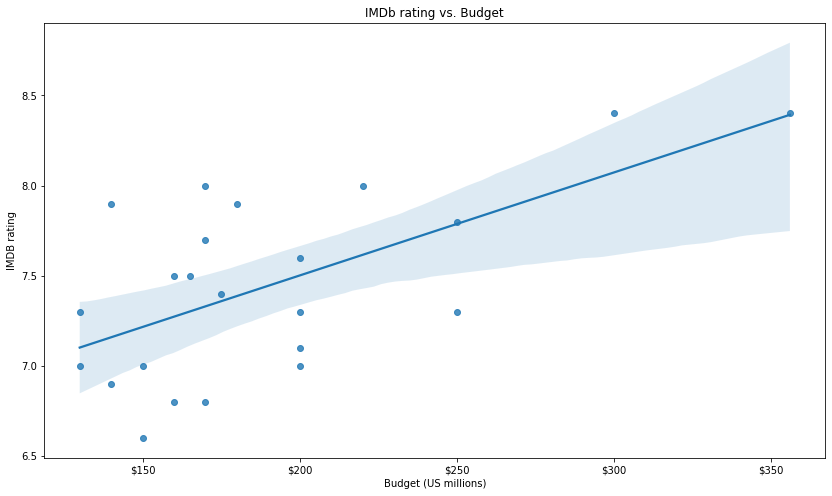

In [10]:
plt.figure(figsize=(14, 8))
plt.title("IMDb rating vs. Budget")

g = sns.regplot(x=mcu_df['Budget'], y=mcu_df['IMDB rating'])
plt.xticks([150000000, 200000000, 250000000, 300000000, 350000000],['$150','$200','$250','$300','$350'])
plt.xlabel("Budget (US millions)")

While there's definitely a positive relationship between a film's budget and the rating, there are also quite a few data points that are far from that trendline.

### Marvel's Favorite Director
Find the highest-grossing MCU directors (by average total gross).

In [11]:
best_director = mcu_df.groupby('Director')['Total Gross'].mean().sort_values()

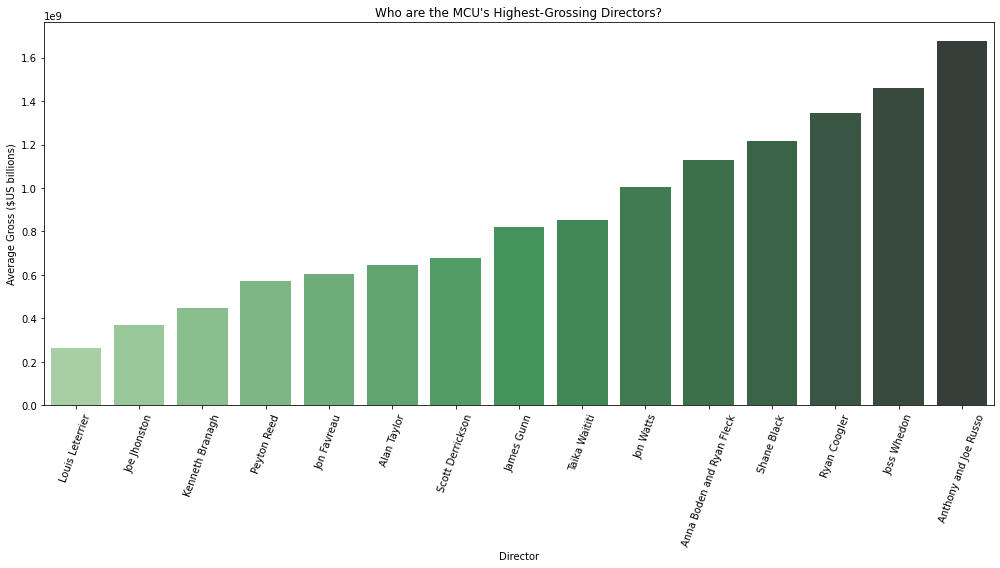

In [12]:
plt.figure(figsize=(14, 8))
plt.title("Who are the MCU's Highest-Grossing Directors?")

pal = sns.color_palette("Greens_d", len(best_director))

sns.barplot(x=best_director.index, y=best_director.values, palette=pal)

plt.xlabel("Director")
plt.xticks(rotation=70)
plt.ylabel("Average Gross ($US billions)")
plt.tight_layout()

### Fan's Favorite Director
Let's find out who MCU fan's favorite directors are by average IMDb score. This code is going to be nearly the same.

In [13]:
fan_best_director = mcu_df.groupby('Director')['IMDB rating'].mean().sort_values()

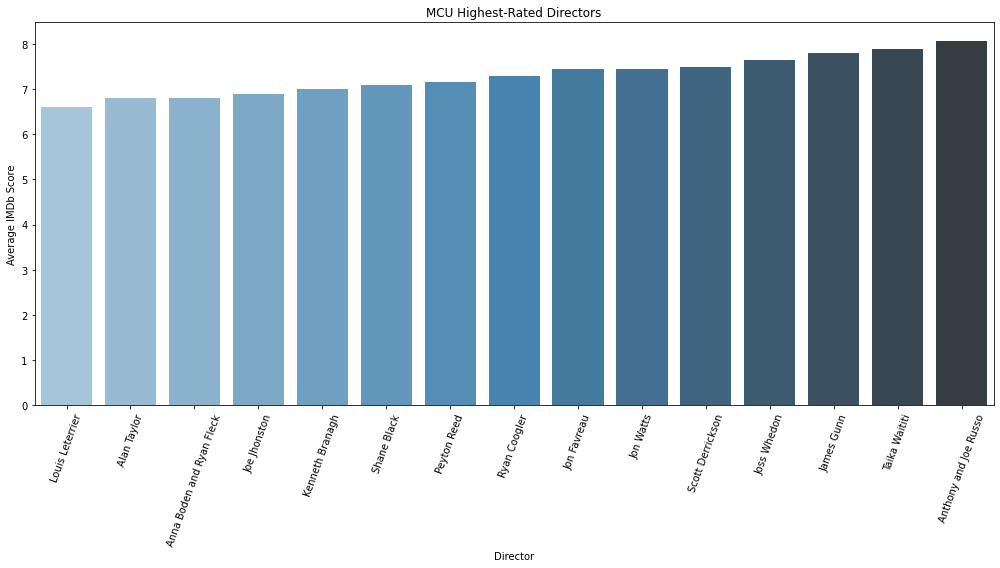

In [14]:
plt.figure(figsize=(14, 8))
plt.title("MCU Highest-Rated Directors")

pal = sns.color_palette("Blues_d", len(best_director))

sns.barplot(x=fan_best_director.index, y=fan_best_director.values, palette=pal)

plt.xlabel("Director")
plt.xticks(rotation=70)
plt.ylabel("Average IMDb Score")
plt.tight_layout()

### Fan-favorite Cast Members
Just for fun, let's find out who MCU fan's favorite cast member is by looking at their average IMDb scores. (This is unofficial, of course. Not every cast member is listed in every film in which they appear.)

We'll start by splitting up the `Cast` column to get a rating for each actor credited in our data set.

In [15]:
mcu_cast_df = mcu_df[['IMDB rating', 'Cast']]
mcu_cast_df = mcu_cast_df.assign(Cast = mcu_cast_df['Cast'].str.split(' , '))
mcu_cast_df = mcu_cast_df.explode('Cast')
mcu_cast_df['Cast'] = mcu_cast_df['Cast'].str.strip()

In [16]:
fan_best_actor = mcu_cast_df.groupby('Cast')['IMDB rating'].mean().sort_values()

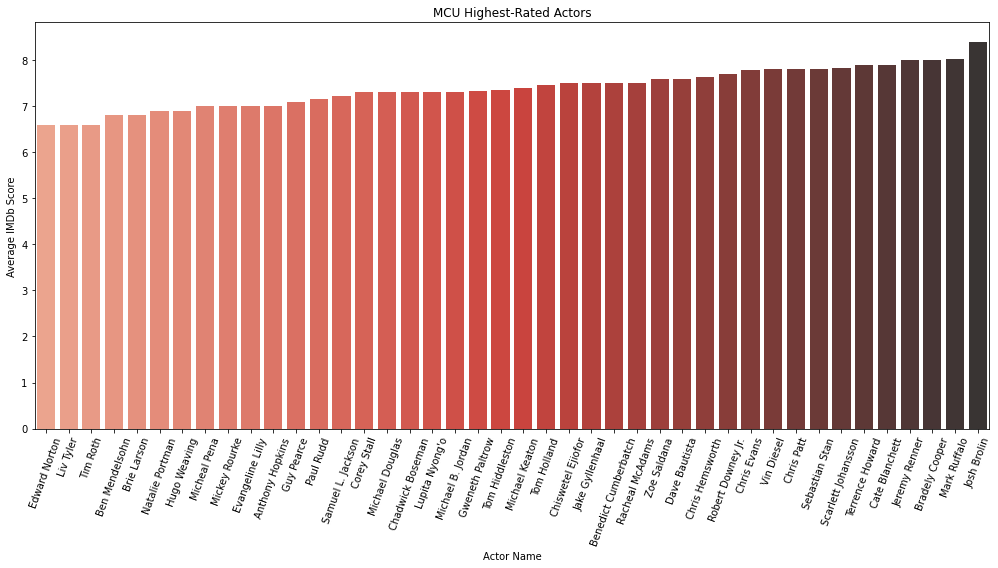

In [17]:
plt.figure(figsize=(14, 8))
plt.title("MCU Highest-Rated Actors")

pal = sns.color_palette("Reds_d", len(fan_best_actor))

sns.barplot(x=fan_best_actor.index, y=fan_best_actor.values, palette=pal)

plt.xlabel("Actor Name")
plt.xticks(rotation=70)
plt.ylabel("Average IMDb Score")
plt.tight_layout()

Josh Brolin comes in first, and benefits a lot from being credited only in some of the top-rated MCU films. Mark Ruffalo is second, and benefits from not being in the solo Hulk films (apologies to Edward Norton). Other actors who were in the ensemble Avengers films (for example, Chadwick Boseman) would certainly have a higher average rating if they had been credited for being in those films.

I hope you had as much fun as I did exploring this data set!